# Dialects of Discord. Changing vocabularies in the Dutch Cruise Missile discussion

### anonym

### anonym

 [![cc-by](https://licensebuttons.net/l/by/4.0/88x31.png)](https://creativecommons.org/licenses/by/4.0/) 
©<AUTHOR or ORGANIZATION / FUNDER>. Published by De Gruyter in cooperation with the University of Luxembourg Centre for Contemporary and Digital History. This is an Open Access article distributed under the terms of the [Creative Commons Attribution License CC-BY](https://creativecommons.org/licenses/by/4.0/)

 [![cc-by-nc-nd](https://licensebuttons.net/l/by-nc-nd/4.0/88x31.png)](https://creativecommons.org/licenses/by-nc-nd/4.0/) 
©<AUTHOR or ORGANIZATION / FUNDER>. Published by De Gruyter in cooperation with the University of Luxembourg Centre for Contemporary and Digital History. This is an Open Access article distributed under the terms of the [Creative Commons Attribution License CC-BY-NC-ND](https://creativecommons.org/licenses/by-nc-nd/4.0/)

In [1]:
library("IRdisplay")
display_png(file="cover.png")  

NameError: name 'library' is not defined

In [8]:
!jupyter --version

Selected Jupyter core packages...
IPython          : 7.31.1
ipykernel        : 6.15.2
ipywidgets       : 7.6.5
jupyter_client   : 7.3.4
jupyter_core     : 4.11.1
jupyter_server   : 1.18.1
jupyterlab       : 3.4.4
nbclient         : 0.5.13
nbconvert        : 6.4.4
nbformat         : 5.5.0
notebook         : 6.4.12
qtconsole        : 5.2.2
traitlets        : 5.1.1


Word embeddings, word2vec, nuclear weapons, popular protest, parliamentary history

This paper investigates the changing vocabulary used in Dutch parliamentary debates during the cruise missile controversy and its immediate aftermath (1970-1990). Using word embedding models (WEMs), we show that while declared policy preferences were rigid throughout the period, the preferred terminology of politicians changed markedly under influence of public protests and the thawing of Soviet-US relations during the 1980s. We show how application of a Word Embedding Model (WEM) can be used to reveal, in a systematic manner, changes in tone in historical political vocabulary.

## Introduction

On 29 October 1983 over 550.000 people marched in The Hague in the largest ever street protest in Dutch history. The marchers had been affected by what the American historian Walter Laqueur had earlier termed 'Hollanditis': a neutralist-pacifist sentiment that seemed to spread through Europe like a virus <cite data-cite="2361604/7ZPBFFIP"></cite>. The cause of their 'disease' was nuclear proliferation. The marchers of 1983 were a very diverse group of people, ranging from church organizations to anarchists, but they were all adamant about one thing: NATO was not going to be allowed station nuclear arms in the Netherlands.

Nuclear weapons divided Dutch society in the late 1970s and early 1980s. In retrospect, the discussion about their placement seems almost moot. The first nuclear weapons had already been placed in the country in 1957, on Volkel airbase, where these geriatric warheads remain until today <cite data-cite="1198963/BXVSHFUR"></cite>. The Tomahawk cruise missiles that were supposed to be placed in the Netherlands, causing controversy in the 1980s, never actually came. Not because of political opposition to their placement, for the government agreed to their placement in 1985, but because of the adoption of a new policy of mutual arms reduction by the United States and the USSR.

The eventual pointlessness of the controversy does not make the case less interesting or relevant for students of political history. The issue was highly polarizing, especially because of its binary nature. The controversy did not center on how many, or what type of nuclear weapons were to be stationed in the Netherlands, but whether any could be stationed there at all. In this debate, there could be no middle ground and a compromise was impossible from the outset. This is also reflected in the positioning of political parties. As the country was in the grip of the debate about nuclear arms, no single party changed its official position on the issue. Broadly speaking, the right favored and the left rejected the stationing of the cruise missiles.

The clear and unchanging positions of political parties did not necessarily reflect the views of individual representatives, party members, or voters. Many people on the political right were opposed to the stationing cruise missiles, often strongly, which especially affected the Christian Democratic party (Christian Democratic Appeal, CDA). Likewise, the seemingly united opposition to nuclear proliferation on the left, in retrospect, may have worked to mute the voices of proponents of the NATO plan, who did in fact exist within the Labour Party (PvdA). The uncompromising stance of all political parties in this highly emotional debate threatened party discipline in parliament, the stability of political parties themselves, as well as their electoral success <cite data-cite="2361604/X8WYDXZC"></cite>.

In Dutch historiography two observations about the missile discussion stand out. In the first place, the notion that the gap between the proponents and opponents was stable as it was unbridgeable <cite data-cite="2361604/SGS86SFR"></cite>. The second point is that, however large in terms of popular participation, the debate did not have political consequences. In this view, the end of the cold war effectively ended the debate. Looking purely at party-political standpoints, this indeed seems to be correct. We argue, however, that in spite of the seemingly stable opinions, political views on nuclear proliferation were changing and that these changes left a clear mark on political discourse at the time.

While the political debate seemed to rage between perfectly immobile blocks, the vocabularies chosen by politicians to discuss nuclear weapons reflect the diversity of opinion and the problems that diversity posed for politicians. These vocabularies, moreover, changed significantly in the course of about a decade. Through a computational analysis of the language used in the Dutch parliament between 1970 and 1985, we can show that these vocabularies converged strongly, while also moving, collectively, towards one that was overwhelmingly negative about nuclear proliferation and positive about attempts at non-proliferation <cite data-cite="2361604/H37HWZRZ"></cite> <cite data-cite="2361604/X2P36K7Y"></cite>. The changing ways in which the issue of nuclear weapons was discussed in the Netherlands suggest that the political discord may have been waning in the early to mid-eighties, probably under the influence of thawing relations between the NATO and Soviet blocks.

We aim to investigate, first, if the different viewpoints are reflected in the word choice used in political discourse. In another binary, and highly emotive, debate, about abortion rights in the United States, vocabularies have been shown to differ significantly depending on political position <cite data-cite="2361604/ZUZCHZ3U"></cite>. As yet, it remains to be confirmed if the same thing happens in the Dutch nuclear proliferation discussion. A second aim is to investigate whether the vocabularies of political parties remained the same through time, or whether they were subject to change. As said, political positions on the binary question regarding the placement of cruise missiles did not change. In other words, those opposed remained opposed, those in favour remained in favour. The geopolitical context, however, did change and relationships between NATO and Warsaw Pact blocks were subject to change in the period under scrutiny. We aim to investigate not only whether vocabularies reflected political positions, but also if these vocabularies changed with political changes, in spite of ostensible stability (of viewpoints). 

# Historical Context

The controversy in the Netherlands was a direct consequence of the NATO Double-Track Decision of December 1979. In reaction to the presence of mobile SS20 missiles in Warsaw Pact countries, which directly threatened Western Europe, NATO decided to station 572 American middle-range missiles in five European member states (Belgium, the United Kingdom, Italy, The German Federal republic and the Netherlands). At the same time, NATO offered the USSR immediate disarmament talks to reduce the number of nuclear weapons in Europe <cite data-cite="2361604/ERXFWLA4"></cite>.

By the time of the Double-Track Decision, the Netherlands already had an outspoken anti-nuclear peace movement. In 1977 the IKV (Interfaith Peace Forum), an ecumenical Christian organization which strove to "free the world of nuclear arms, starting with The Netherlands" had been founded <cite data-cite="undefined"></cite>. In opposition to the narrative of the need to build nuclear deterrent against a nuclear foe, peace activists placed the need for unilateral disarmament in the West. The NATO Double-Track Decision of 1979 led to the foundation of the nonpartisan Komitee Kruisraketten Nee (Committee Cruise Missiles No). The anti-nuclear movement was gaining momentum and broad support <cite data-cite="undefined"></cite>.


Although many in the Netherlands were opposed to nuclear proliferation, the country was also a founding member of NATO and traditionally loyal both to that organization and to the geopolitical ambitions of the United States. For many mainstream politicians, and for the parties they belonged to, the issue soon became a difficult one. Labour voters in particular were overwhelmingly opposed to the placement of nuclear weapons in the Netherlands. The Labour Party, however, remained (and remains) in favor of NATO membership. It proved far from easy to combine an antinuclear and pro-NATO stance. The Christian Democratic parties - initially the Catholic Peoples Party (KVP), Christian Historical Union (CHU) and Anti-Revolutionary Party (ARP), later combined into the Christian Democratic Appeal (CDA)- favored deployment of nuclear weapons in the Netherlands, but faced internal rebellions from anti-proliferation MPs as well as voter opposition <cite data-cite="2361604/X8WYDXZC"></cite>.

For other parties, notably the liberal-conservative People's Party for Freedom and Democracy (VVD) and the Communist Party of the Netherlands (CPN), it was far less difficult to maintain a consistent policy from the beginning to the end of the discussion. The liberals were strongly pro-NATO and strongly in favor of the stationing of the cruise missiles. The CPN was clearly against NATO and consequently also against the stationing of nuclear missiles in the Netherlands. Most other political parties, including several fundamentalist Christian parties and left-leaning splinter groups, likewise were stable in their views for or against nuclear weapons.

Both the Christian Democratic Appeal and the Labour Party faced internal rebellions with regard to nuclear proliferation and NATO membership. For both parties, loyalty to NATO and a widespread distaste for nuclear weapons proved a divisive combination. Individuals occasionally refused to toe the party line <cite data-cite="2361604/RRD2J9DJ"></cite>. Party programs of the era also reveal the struggle to find, or at least suggest, a compromise. The Labour Party's program of 1982, for example, formulates the ambition for the Netherlands to become 'a critical member' of NATO, in the apparent hope that this would neutralize the problem of being part of a nuclear military organization, while opposing nuclear arms on principle <cite data-cite="1198963/H7BZIGSB"></cite>.

In this article, we do not use party programs or policy papers. Instead, we focus on debates held in both houses of the Dutch parliament between 1975 and 1990. We use the verbatim minutes of all parliamentary debates, a dataset that is known in Dutch as the Handelingen der Staten-Generaal. 


## Data

We aim to investigate political vocabulary in debates about nuclear proliferation by using the proceedings of the upper and lower houses of Dutch parliament (Handelingen der Staten-Generaal). These documents contain the verbatim minutes of both houses of Dutch parliament. The dataset contains metadata linking each speech to a date, topic, speaker, and political party. The Handelingen are available in machine-readable form. The complete minutes of both houses of parliament for the period 1814-1995 were first digitized by the Royal Library of the Netherlands and made available to the public in 2010. The dataset for the period since 1930 was dramatically improved in the Political Mashup project. Currently, the improved and enriched dataset is freely available on request from DANS, the Dutch national repository of research data. The dataset consists of a large collection of XML files containing the complete minutes of all the meetings of the lower and upper chambers of parliament, separated by date, speaker, political affiliation, and more <cite data-cite="2361604/AZGP28RE"></cite>.

Although parliamentary records always list an individual MP as the 'speaker' behind a speech, this source is not suitable for identifying individual viewpoints. Most parties with more than one or two seats appointed specialized spokespersons for specific subjects, whose job it was to represent his or her parliamentary group. As a consequence, it is difficult to identify personal disagreements within groups by analyzing parliamentary speech. That is not to say, on the other hand, that intra-party disagreements cannot be reflected in the terms eventually used.

## Method: Word Embedding Models and Historical Research

We have analyzed the Handelingen by using Word Embedding Models (WEMs). WEMs can be understood as a family of machine learning techniques  able to extract information about words from their distribution in a given corpus of natural language. The distribution of words, which is to say the frequency in which they occur and co-occur, can be learned, approximately, by algorithms. This makes it possible to predict the context, defined as other, proximate words, in which each word occurs in a corpus. This 'context' is expressed as a list of other words ranked by their proximity or 'closeness' to the word in question. In this investigation, we use the implementation known as the Word2Vec algorithm. Word2Vec trains neural networks to investigate the ways in which a specific word is used in a given corpus of text. To do so, the algorithm calculates a so called 'vector' for each unique word to describe its relation to all other words. These vectors together make up the 'vector space'. The proximity of word vectors within vector space represents a more or less common or shared context (between words) <cite data-cite="2361604/WMBLK3NQ"></cite> <cite data-cite="2361604/9VBDX4M2"></cite> <cite data-cite="1198963/JCSZY32M"></cite>.

Proximity in vector space does not describe any specific type of linguistic similarity that exists between words in the corpus. Some words are synonyms or near synonyms of each other, or have very similar usages, for example 'tea' and 'coffee'. Some words often appear in combination ('New' and 'York'). The analytic possibilities of WEMs, as we will demonstrate below, go far beyond these trivial examples of proximity. With WEMs we are be able to identify associations and relations between words that are not self-evident but relevant.

The proximity of word vectors can be described as 'dot product', a distance metric that is expressed as a value between -1 and 1. This is a measure to describe the angle between two vectors and their length. A value of 0 means no proximity, and can be interpreted as a score representing no similarity or relationship between words. A value of 0.99 means very close proximity, where there is an almost perfectly similar relationship between word vectors. In theory, a value of -1 would represent an opposite relationship between two words. However, in practice virtually all scores are between 0 and 1. This is also true for antonyms and words with opposite meanings. Since the model has been trained on a specific corpus of minutes of parliamentary debates, these relationships reconstruct the use of terms only within that corpus. It is not meaningful to compare a word vector from one trained model, to a word vector in another trained model. This is a handicap when applying WEMs to historical research, because within a single model there is no possibility to investigate change through time, while word vectors from a diachronic sequence of trained models cannot be compared. Our aim is to work around this problem by using overlapping windows (dot product) <cite data-cite="2361604/WMBLK3NQ"></cite>.

We have used the implementation of the Word2Vec algorithm in the R-package Word2Vec, authored and maintained by Jan Wijffels <cite data-cite="8918850/DJWGF63V"></cite>. The Word2Vec algorithm initially was developed with a different aim than the one for which we are using it <cite data-cite="1198963/JCSZY32M"></cite>. Word2Vec was developed to investigate natural language per se, for example to identify (near-)synonyms. In historical investigations, the statistical modelling of language is not usually the objective. Rather than trying to identify linguistic regularities and generalities, we focus on linguistic irregularities, particularities, and patterns to identify the influence of political and historical change on changes in the vocabulary used in political speech <cite data-cite="2361604/9VBDX4M2"></cite> <cite data-cite="2361604/H37HWZRZ"></cite> <cite data-cite="2361604/WMBLK3NQ"></cite>.


We have limited ourselves to unique words that appear five times or more in the entire 1970-1990 dataset of parliamentary debates and we have limited the number of dimensions of each vector to 100. We experimented with more dimensions of several hundreds, but longer vectors seem to be useful only with (much) larger corpora, and require much more computational power. The corpus of the Handelingen is vast by the standards of historical research, but not very large for the kind of analysis we are undertaking <cite data-cite="2361604/WMBLK3NQ"></cite>. We have trained our dataset with a Skip-Gram Word2Vec model, which has anecdotally been shown to yield better results on smaller datasets, compared to the, alternative, CBOW-method <cite data-cite="1198963/3LD4U97R"></cite>.

In a historical investigation, however, the object of research is not usually a term, but a concept, thing, person, or place. As long as these are referred to with only one term throughout the corpus, for example 'Rotterdam' or 'Brzezinski', this is unproblematic, but as soon as alternative spellings, or different terms are used for the same thing ('Zbigniew' instead of 'Brzezisnki', for example) problems arise. When discussing nuclear weapons, the number of possible terms referring to the same concept is quite large. Since our investigation focuses on nuclear weapons, which may be described with several different terms, we needed to create a so-called 'combined vector' to include more than one word in our vector representation (of a concept).


To achieve this, we trained WEMs on the complete corpus of the Handelingen for the period 1970-1990. Using the resulting vectors, we calculated the nearest neighbours to a vector of an unambiguous Dutch word for nuclear weapon ('kernwapen') to identify which terms have a close proximity to 'kernwapen' in this specific vector space. From these so-called 'nearest neighbours', we have made a manual selection of only synonyms and plurals of the Dutch word for 'nuclear weapon'. These synonyms and plurals were used to create a cluster of varied words with the shared meaning of 'nuclear weapon(s)'. This cluster was then used to generate a so-called combined vector, by averaging the vectors (within the WEM) of all different individual terms. That is to say that this word set was treated as a single term, resulting in a vector of similar length to a single-word vector. This combined vector allowed us to investigate our corpus using all synonyms and near-synonyms of 'kernwapen' as if it were a single term, represented by a single vector <cite data-cite="8918850/DJWGF63V"></cite>.

### Nuclear-weapon word set

| Dutch             | English
|-------------------|-------------------|
| atoomwapen        | atomic weapon
| atoomwapens       | atomic weapons
| kernwapen         | nuclear weapon
| kernwapens        | nuclear weapons
| kruisraket        | cruise missile
| kruisraketten     | cruise missiles
| kruisvluchtwapen  | cruise flight weapon
| kruisvluchtwapens | cruise flight weapons
| lanceraket        | lance rocket
| lanceraketten     | lance rockets
| navokernwapen     | nato nuclear weapon
| navokernwapens    | nato nuclear weapons


The newly created combined vector of 'kernwapen' and its synonyms was then used to identify its nearest neighbours in the WEM, based on the entire corpus 1970-1990. We used the resulting list of 1000 nearest neighbours of the combined nuclear weapon vector to identify words closely linked to nuclear weapons appearing in the complete 1970-1990 parliamentary corpus.

From this list of 1000 nearest neighbours of the combined nuclear weapons vector, we have manually selected the words that evidently exemplify a pro-nuclear proliferation position. This is a human intervention. Together these words form a pro-proliferation word set, a collection of words that is representative of a positive attitude towards the placement of nuclear weapons. We consider this cluster of terms to represent a pro-nuclear weapon discursive space within the model. To put it more precisely, this pro-proliferation discursive space is represented by all the vectors of the terms from the pro-proliferation word set. We repeated this exercise for words typical of an anti-nuclear proliferation stance. Thus we could also create a non-proliferation discursive space in each model we subsequently trained.

### Pro-Nuclear proliferation words


| Dutch                                   | English
|-----------------------------------------|-----------------------------------------
| afschrikking                            | deterrence
| afschrikkingsevenwicht                  | balance of deterrence
| afschrikkingsfunctie                    | deterrence function
| afschrikkingsmacht                      | deterrence force
| afschrikkingspolitiek                   | policy of deterrence
| afschrikkingsrol                        | deterrence role
| afschrikkingsstrategie                  | strategy of deterrence
| afschrikkingstheorie                    | theory of deterrence
| afschrikkingswapen                      | weapon of deterrence
| afschrikkingswapens                     | weapons of deterrence
| afschrikwekkende                        | deterrent
| atoomparaplu                            | nuclear umbrella
| deterrent                               | deterrent
| kernwapenstrategie                      | nuclear arms strategy
| proliferatie                            | proliferation
| proliferatieverdrag                     | proliferation treaty
| strategischnucleaire                    | nuclear-strategic
| tactischnucleaire                       | tactical-nuclear
| waarborgenstelsel                       | system of guarantees
 

### Anti-Nuclear proliferation words


| Dutch               | English
|---------------------|---------------------
| atoomvrij           | nuclear free
| atoomvrije          | nuclear-free
|denuclearisatie      | denuclearisation
|denuclearisering     | denuclearisation
|gedenucleariseerd    | denuclearised
|kernstop             | nuclear hold
|kernwapenvrij        | free of nuclear weapons
|kernwapenvrije       | free of nuclear weapons
|nonproliferatie      | non-proliferation
|nonproliferatieverdrag | non-proliferation treaty
|ontwapening          | disarmament
|ontwapeningsbesprekingen | disarmament talks
|ontwapeningsonderhandelingen | disarmament negotiations
|ontwapeningsoverleg  | disarmament discussion
|wapenbeheersing      | arms control
|wapenbeheersingsbesprekingen | arms control talks
|wapenbeheersingsonderhandelingen | arms control negotiations
|wapenbeperking       | arms reduction
|wapenvermindering    | arms reduction


These two sets of terms play a key role in our attempt to identify preferred vocabularies in the polarized debate about nuclear weapons in the Netherlands. The classification of terms in two categories was done by only two people, the authors of this paper, rather than by a team of annotators. We believe this was justified because we have focused on non-ambiguous, easy-to-classify terms. Annotators may have been useful to classify ambiguous terms as belonging in either list, but that is not our aim here. We do not aim to classify as many terms as possible into the two categories, but only those terms that are unambiguously representative of either viewpoint. Another reason not to rely on annotators is that the body of language we are investigating is over 30 years old. Using present-day annotators may in fact create a misplaced illusion of accuracy, because subtle judgments about the meaning of words by annotators today may not reflect their meaning to language users in the 1970s and 80s entirely accurately.

We do not investigate the specific sentences in which terms were used. If a politician said 'disarmament is a bad idea', the term 'disarmament' will be classified in the same way as when a politician stated that 'disarmament is urgently necessary'. Our research question, however, is not whether politicians expressed a specific opinion, but whether they used a specific vocabulary. The very fact that 'disarmament' was mentioned, is evidence that the concept is being discussed. We do not need to know parties opinions, since those are known as they are evidently expressed in party programmes and parliamentary voting behaviour. We are interested in the scope of discussions in different periods and in the speeches for different parties. We expect the scope of the discourse to change through time and between political parties. Since parliamentarians were free to choose their words, the speeches are an indication of the shifting topical boundaries of their vocabularies.

## Method: Investigating the Word Embedding Model

In [44]:
R.version

               _                           
platform       x86_64-apple-darwin17.0     
arch           x86_64                      
os             darwin17.0                  
system         x86_64, darwin17.0          
status                                     
major          4                           
minor          1.1                         
year           2021                        
month          08                          
day            10                          
svn rev        80725                       
language       R                           
version.string R version 4.1.1 (2021-08-10)
nickname       Kick Things                 

In [45]:
# Load installed R-packages from library
library(magrittr)
# The bnosac Word2Vec package is used to train Word Embedding Models. 
# See also https://github.com/bnosac/word2vec.
library(word2vec) 
library(stringr)
library(dplyr)
library(data.table)

In [46]:
# As this script is meant for demonstration purposes, it uses only text data from the 1970-1975 period. 
# The article uses more data, for more periods, but these are not included in this example, because of space constraints.
# The authors will be happy to provide all data on request. 

# This file containing the raw texts can be downloaded from GitHub and loaded into the RStudio
# environment using the following command:
files2 <- data.table::fread("https://raw.githubusercontent.com/jdh-observer/jdh001-9HcfToh7EYm8/main/parl_texts_7075.csv",
    header = TRUE, encoding = "UTF-8")

# A pre-processed version of parliamentary texts is used. 
# Punctuation and stop words are removed from the texts and all letters are set to lower case.  
# Functions removePunctuation, removeWords, and tolower from package 'tm' are used. 

To  investigate  the  course  of  the  debate,  and  the  preferred  vocabularies  of  different  political  parties,  we  trained separate,  smaller,  WEMs using only speeches of each of four political parties (CPN, VVD, PvdA, and CDA) in four shorter timeslots (1970-1975, 1975-1980, 1980-1985, and 1985-1990). We use these partly overlapping time slots of five years, shifting towards the present, to generate a shifting window that is able to capture possible changes through time. To keep these (party-specific) sub-datasets large enough to train separate WEMs, we decided not to use smaller time slots or separate datasets for every year. As the Christian-Democratic Appeal (CDA) was not yet established in the first timeslot (1970-1975), this procedure led to the creation of 15 different WEMs.

In [47]:
# Subset party-specific data and train word2vec model for each party.

# 1. CPN (Communistische Partij Nederland) Subset period and party, set column
# 'text' as character vector to serve as input for word2vec package
files2 %>%
    filter(str_detect(doc_id, "cpn")) -> cpn.7075
cpn.7075 <- as.character(cpn.7075$text)

# Train word2vec model
model.cpn.7075 <- word2vec(x = cpn.7075, min_count = 5, threads = 4, type = "skip-gram",
    dim = 100, iter = 20)

# Create matrix
emb.cpn.7075 <- as.matrix(model.cpn.7075)

In [50]:
# 2. VVD (Volkspartij voor Vrijheid en Democratie) Subset period and party, set
# column 'text' as character vector to serve as input for word2vec package
files2 %>%
    filter(str_detect(doc_id, "vvd")) -> vvd.7075
vvd.7075 <- as.character(vvd.7075$text)

# Train word2vec model
model.vvd.7075 <- word2vec(x = vvd.7075, min_count = 5, threads = 4, type = "skip-gram",
    dim = 100)

# Create matrix
emb.vvd.7075 <- as.matrix(model.vvd.7075)

In [53]:
# 3. PvdA (Partij van de Arbeid) Subset period and party, set column 'text' as
# character vector to serve as input for word2vec package
files2 %>%
    filter(str_detect(doc_id, "pvda")) -> pvda.7075
pvda.7075 <- as.character(pvda.7075$text)

# Train word2vec model
model.pvda.7075 <- word2vec(x = pvda.7075, min_count = 5, threads = 4, type = "skip-gram",
    dim = 100)

# Create matrix
emb.pvda.7075 <- as.matrix(model.pvda.7075)

In [56]:
# 4. CDA (Christen-Democratische Appel) (NOTE: this party did not yet exist before 1980. Therefore the CDA is skipped in this example using '#') 
# Subset specific year, set as character vector to serve as input for word2vec package
#files2 %>%
#  filter(str_detect(doc_id, "cda")) -> cda.7075
#cda.7075 <- as.character(cda.7075$text)

# Train word2vec model
#model.cda.7075 <- word2vec(x = cda.7075, min_count = 5, threads = 4, type = 'skip-gram', dim = 100)

# Create matrix
#emb.cda.7075 <- as.matrix(model.cda.7075)

For every party, in every time slot, we identified the preferred vocabulary for dicussing nuclear weapons within each WEM. These  vocabularies were identified by recalculating the combined nuclear weapon vector, using the same set  of synonyms and near-synonyms, but within each time-, and party specific model. We defined the time- and party specific nuclear-weapon vocabularies by taking the 100 nearest-neighbour words of the combined nuclear-weapon vector in each of the 15 WEMs. This resulted in a collection of 100-term sets most preferred by MPs of specific parties in specific periods when discussing nuclear weapons.

The final step in this investigation is to position (or 'map') each term of these 100 words in accordance with their proximity to the proliferation and non-proliferation viewpoints. A term such as 'disarmament' will likely appear close to the non-proliferation axis, whereas 'security' would be closer to the pro-proliferation axis. Based on these positions, we can map how near each preferred vocabulary is to each of the two viewpoints. To do this, we have calculated a proximity metric (dot product), for each term in each set, to measure the proximity to the pro-proliferation and non-proliferation word vectors. 

To do so, we first calculated combined vectors for both the pro-proliferation and anti-proliferation word sets within each party- and time specific WEM. This enables us to calculate the proximity of each of the 100 terms to each of the two opposing viewpoint vectors (within their model). These proximity scores reflect how close each of the 100 terms is to each of the viewpoint vectors. The proximity scores are plotted as data points in the following graph(s). It is important to emphasize that these calculations are valid only within their WEM. Notably, a certain nearest-neighbour term, for example 'safety' can be, and in fact often is, closer in vector space to non-proliferation in the parlance of one party and closer to pro-proliferation in another. It means that one party uses the word in a similar way to their use of pro-proliferation terms like 'deterrence', whereas the other uses it in a more similar way to the way it uses non-proliferation words like 'disarmament'. Hence, we position the terminology used to discuss nuclear weapons on a political spectrum based on the 'dialect' spoken by that specific party in that specific time frame. 

In [57]:
# Now that we have trained the models we continue with the analysis.
# Create the word lists in the RStudio environment. These lists are generic as they are used for every party.
words.weapon <-  c("kernwapen", "kernwapens", "atoomwapen", "atoomwapens", "kruisraket", "kruisraketten", "kruisvluchtwapen", "kruisvluchtwapens", "lanceraket", "lanceraketten", "navokernwapen", "navokernwapens" )
words.prol <- c("afschrikking",  "tactischnucleaire",  "proliferatieverdrag",  "strategischnucleaire", "proliferatie", "afschrikkingsevenwicht",  "afschrikkingsstrategie", "atoomparaplu", "waarborgenstelsel", "kernwapenstrategie" , "afschrikwekkende", "afschrikkingstheorie", "deterrent", "afschrikkingsfunctie", "afschrikkingspolitiek", "afschrikkingsrol", "afschrikkingswapen", "afschrikkingswapens", "afschrikkingsmacht") 
words.nonprol <- c("ontwapening", "nonproliferatieverdrag", "kernwapenvrije", "kernwapenvrij", "denuclearisatie", "atoomvrije", "nonproliferatie",  "wapenbeperking", "wapenbeheersingsbesprekingen", "ontwapeningsbesprekingen", "kernstop", "ontwapeningsoverleg", "denuclearisering", "atoomvrij",   "gedenucleariseerd", "wapenbeheersing", "ontwapeningsonderhandelingen", "wapenbeheersingsonderhandelingen", "wapenvermindering") 


We use the trained word2vec models and the word lists for analysis of the CPN data.

In [58]:
# 1. CPN
# Create 'kernwapen' vector 
wv.cpn <- predict(model.cpn.7075, newdata = words.weapon, type = "embedding")
wv.cpn <- na.omit(wv.cpn)
comb.wv.cpn <- colMeans(wv.cpn) 

In [59]:
# Extract 100 nearest neighbours from 'kernwapen' in vector space
nns_wv.cpn <- predict(model.cpn.7075, newdata = comb.wv.cpn, type="nearest", top_n=100)
vecs_nns_nuc.100.cpn <- emb.cpn.7075[nns_wv.cpn$term,]

In [60]:
# Create 'proliferation' vector
pv.cpn <- predict(model.cpn.7075, newdata = words.prol, type = "embedding")
pv.cpn <- na.omit(pv.cpn)
comb.pv.cpn <- colMeans(pv.cpn) 

In [61]:
# Create 'non-proliferation' vector
nv.cpn <- predict(model.cpn.7075, newdata = words.nonprol, type = "embedding")
nv.cpn <- na.omit(nv.cpn)
comb.nv.cpn <- colMeans(nv.cpn) 

In [62]:
# Calculate distance (cosine similarity). We use these scores to plot the results 
# Create scores for plotting by comparing vectors of 'kernwapen' and proliferation vs non-proliferation
score_prol.cpn <- as.data.frame(word2vec_similarity(vecs_nns_nuc.100.cpn, comb.pv.cpn))
score_nonprol.cpn <- as.data.frame(word2vec_similarity(vecs_nns_nuc.100.cpn, comb.nv.cpn))


We use the trained word2vec models and the word lists for analysis of the VVD data.

In [63]:
# 2. VVD
# Create 'kernwapen' vector 
wv.vvd <- predict(model.vvd.7075, newdata = words.weapon, type = "embedding")
wv.vvd <- na.omit(wv.vvd)
comb.wv.vvd <- colMeans(wv.vvd) 

In [64]:
# Extract 100 nearest neighbours from 'kernwapen' in vector space
nns_wv.vvd <- predict(model.vvd.7075, newdata = comb.wv.vvd, type="nearest", top_n=100)
vecs_nns_nuc.100.vvd <- emb.vvd.7075[nns_wv.vvd$term,]

In [65]:
# Create 'proliferation' vector
pv.vvd <- predict(model.vvd.7075, newdata = words.prol, type = "embedding")
pv.vvd <- na.omit(pv.vvd)
comb.pv.vvd <- colMeans(pv.vvd) 

In [66]:
# Create 'non-proliferation' vector
nv.vvd <- predict(model.vvd.7075, newdata = words.nonprol, type = "embedding")
nv.vvd <- na.omit(nv.vvd)
comb.nv.vvd <- colMeans(nv.vvd) 

In [67]:
# Calculate distance (cosine similarity). We use these scores to plot the results 
# Create scores for plotting by comparing vectors of 'kernwapen' and proliferation vs non-proliferation
score_prol.vvd <- as.data.frame(word2vec_similarity(vecs_nns_nuc.100.vvd, comb.pv.vvd))
score_nonprol.vvd <- as.data.frame(word2vec_similarity(vecs_nns_nuc.100.vvd, comb.nv.vvd))


We use the trained word2vec models and the word lists for analysis of the PvdA data.

In [3]:
# 3. PvdA
# Create 'kernwapen' vector 
wv.pvda <- predict(model.pvda.7075, newdata = words.weapon, type = "embedding")
wv.pvda <- na.omit(wv.pvda)
comb.wv.pvda <- colMeans(wv.pvda)

SyntaxError: invalid syntax (1933419128.py, line 3)

In [69]:
# Extract 100 nearest neighbours from 'kernwapen' in vector space
nns_wv.pvda <- predict(model.pvda.7075, newdata = comb.wv.pvda, type="nearest", top_n=100)
vecs_nns_nuc.100.pvda <- emb.pvda.7075[nns_wv.pvda$term,]

In [70]:
# Create 'proliferation' vector
pv.pvda <- predict(model.pvda.7075, newdata = words.prol, type = "embedding")
pv.pvda <- na.omit(pv.pvda)
comb.pv.pvda <- colMeans(pv.pvda) 

In [71]:
# Create 'non-proliferation' vector
nv.pvda <- predict(model.pvda.7075, newdata = words.nonprol, type = "embedding")
nv.pvda <- na.omit(nv.pvda)
comb.nv.pvda <- colMeans(nv.pvda) 

In [72]:
# Create 'non-proliferation' vector
nv.cpn <- predict(model.cpn.7075, newdata = words.nonprol, type = "embedding")
nv.cpn <- na.omit(nv.cpn)
comb.nv.cpn <- colMeans(nv.cpn) 

In [73]:
# Calculate distance (cosine similarity). We use these scores to plot the results 
# Create scores for plotting by comparing vectors of 'kernwapen' and proliferation vs non-proliferation
score_prol.pvda <- as.data.frame(word2vec_similarity(vecs_nns_nuc.100.pvda, comb.pv.pvda))
score_nonprol.pvda <- as.data.frame(word2vec_similarity(vecs_nns_nuc.100.pvda, comb.nv.pvda))


We use the trained word2vec models and the word lists for analysis of the CDA data (not used in this 1970-1975 example).

In [4]:
# 4. CDA
# Create 'kernwapen' vector 
#wv.cda <- predict(model.cda.7075, newdata = words.weapon, type = "embedding")
#wv.cda <- na.omit(wv.cda)
#comb.wv.cda <- colMeans(wv.cda) 

# Extract 100 nearest neighbours from 'kernwapen' in vector space
#nns_wv.cda <- predict(model.cda.7075, newdata = comb.wv.cda, type="nearest", top_n=100)
#vecs_nns_nuc.100.cda <- emb.cda.7075[nns_wv.cda$term,]

# Create 'proliferation' vector
#pv.cda <- predict(model.cda.7075, newdata = words.prol, type = "embedding")
#pv.cda <- na.omit(pv.cda)
#comb.pv.cda <- colMeans(pv.cda) 

# Create 'non-proliferation' vector
#nv.cda <- predict(model.cda.7075, newdata = words.nonprol, type = "embedding")
#nv.cda <- na.omit(nv.cda)
#comb.nv.cda <- colMeans(nv.cda) 

# Calculate distance (cosine similarity). We use these scores to plot the results

# Calculate distance (cosine similarity). We use these scores to plot the results 
# Create scores for plotting by comparing vectors of 'kernwapen' and proliferation vs non-proliferation
#score_prol.cda <- as.data.frame(word2vec_similarity(vecs_nns_nuc.100.cda, comb.pv.cda))
#score_nonprol.cda <- as.data.frame(word2vec_similarity(vecs_nns_nuc.100.cda, comb.nv.cda))


The aforementioned approach fullfills a function similar to discourse analysis in historisch research. However, whereas traditional methodology focuses on the deep understanding of expressions within their context, this method uses relatively minute shifts in choice of words to identify changing vocabularies. Results of this analysis described are plotted and described in the next section. We believe it is important to note that in describing and interpreting the results, we have chosen to avoid using direct exemplary quotations from the parliamentary records. Doing so would effectively lead to cherry-picking. It would be possible, specifically, to find quotations of proponents of nuclear armaments that discuss and/or acknowledge the unpleasantness of such weapons. We fear that by quoting them directly, we are suggesting a more 'surface level' change than we actually observe, a problem also discussed by Blaxill and Van Lange <cite data-cite="2361604/9ZF3RWH8"></cite> <cite data-cite="undefined"></cite>.

## Results

The figures below plot the position of the 100 terms used by each of the political parties in a given period to discuss nuclear weapons. Each term is plotted as a single data point in the following graphs, based on its proximity (score) to the proliferation and non-proliferation word vectors. Although they are plotted in the same figure, the underlying scores are based on separate, party-specific WEMs. On the one hand, this visualisation allows us to study the use of terminology within the manner of speech of a specific party at a given time. On the other hand, the comparability of results is highly questionable. To make the outcomes of different parties comparable, the uniform pro- and anti-proliferation vectors are crucial. We cannot compare party-specific WEMs outright, but we can show how parties position themselves, through speech, on the pro-anti continuum.

This method, although admittedly cumbersome, has considerable advantages.  The 100 preferred terms of each party can change through time, and the position of each word vector in each consecutive WEM is different. But the position of the 100 nearest-neighbour terms for each party and each period, relative to the sets of pro- and anti-proliferation terms can be calculated, and compared, by using dot product metrics.

In [5]:
# Create the plot, plot scores for each party, use a different colour for each
# party.
plot(score_prol.pvda$V1, score_nonprol.pvda$V1, ylim = c(0, 1), xlim = c(0, 1), xlab = "Proliferation",
    ylab = "Non-proliferation", type = "p", pch = 16, col = c("blue"), 
    main = "Party-specific nuclear weapon vocabularies plotted by their similarity to proliferation words(x) and non-proliferation words(y) 1970-1975"),
     cex.main=0.8,
points(score_prol.cpn$V1, score_nonprol.cpn$V1, pch = 16, col = c("red"))
points(score_prol.vvd$V1, score_nonprol.vvd$V1, pch = 16, col = c("black"))
# points(score_prol.cda$V1, score_nonprol.cda$V1, pch=16, col=c('green'))

# Plot abline
abline(a = 0, b = 1)

# Create legend
legend("bottomright", legend = c("CPN", "VVD", "PvdA"), col = c("red", "black", "blue"),
    lwd = 11, cex = 0.8)

SyntaxError: invalid syntax (2761316795.py, line 3)

The early 1970s reveal the pattern that was to be expected at the height of the cold war. The Moscow-oriented Communist Party of the Netherlands (CPN) uses a vocabulary that reflects its emphasis on the need for one-sided disarmament and non-proliferation. To put it differently, their preferred terminology falls within the discursive space of non-proliferation. The vocabularies of the Liberal parliamentarians (VVD) score almost exclusively on the other side of the binary spectrum. Labour (PvdA), similar to the Liberals, scores strikingly high on 'pro-proliferation' as well. From this we infer that at this point in time major non-communist parties spoke about nuclear weapons in roughly the same way. The stationing of nuclear weapons in the Netherlands was not yet an issue, whereas loyalty to NATO and the western defence against the Soviet Union were important. Nuclear weapons appear to have been accepted as integral to the Atlantic defence against the Soviet block by both relatively progressive and conservative parties.

The political position of Labour (PvdA) regarding membership of NATO, undeniably a nuclear-enabled military organization, did not change, but it did object strongly to the coming of cruise missiles. This is reflected in its vocabulary about nuclear weapons after the Double Track Decision. As can be seen in the 1975-1980 plot, Labour (PvdA) moved entirely over the dividing line, into the non-proliferation discursive space. The Liberal party (VVD) remained partly within the discursive space that the party had inhabited before, although the entirety of parliamentary vocabulary about nuclear weapons clearly emphasized non-proliferation in the 1980s more than before.

In [6]:
library("IRdisplay")
display_png(file="data/plot_7580_parties.jpg") 

NameError: name 'library' is not defined

In [7]:
library("IRdisplay")
display_png(file="data/plot_8590_parties.jpg") 

NameError: name 'library' is not defined

It should be noted, however, that the fact that disarmament was part of vocabularies, does not imply that those speaking agreed with a broadly non-proliferation agenda. The mere fact that anti-nuclear movements were prominent at the time explains that it also became more of a topic to be discussed in parliament.  What can be said, based on the 1975-1980, 1980-1985 (see Appendix), and 1985-1990 plots, on the other hand, is that within these discussions the preferred terminology shifted. Although the majority still walked the walk of the Christian Democrats (CDA) and the Liberals (VVD) regarding NATO, it was talking the talk of anti-nuclear peace activists, placing their vocabularies much closer in discursive space to the communists (CPN) than before.

Another important shift takes place as a consequence of the thaw in US-Soviet relations in the mid-eighties. US president Reagan and Soviet leader Gorbachov agreed in 1986 to the removal of INF nuclear systems in Europa, and agreed to strive towards the complete elimination of nuclear weapons by 1996. This mutual disarmament became a viable option for the foreseeable future. As we see in the 1985-1990 plot (the final timeslot in this investigation), the language of the more conservative parties moved further into the discursive space of nuclear non-proliferation and entirely crossed the line in favour of the non-proliferation terminology. The upwards-moving tendency of all the parties on the non-proliferation-axis can partly also be explained by a growing importance of disarmament and non-proliferation as a topic of discussion.

## Conclusion


The seemingly stable divide between proponents and opponents of nuclear proliferation in The Netherlands, the received wisdom in both contemporary journalism and later historiography, obscures a historical reality of considerable change. While official viewpoints remained unchanged, the topical boundaries of the political discussion were shifting considerably. That they did so, is easy to understand; the changing geopolitical situation in the 1980s especially caused views on proliferation to change. But to demonstrate the shift in political language required a complex exercise in digital history. We believe it is also a useful exercise. Shifts in vocabulary are relevant in many enquiries into political history. To be able to identify what constituted the scope of discourse allows us to identify political shifts separately from their (possible) expression in laws or stated opinions. 

By calculating the proximities between two opposite or related concepts for specific periods, we were able to compare WEMs for different periods. This opens the door for the use of word embeddings as a tool for diachronic historical research, because it enables us to investigate change through time in sufficiently large and consistent historical datasets. Parliamentary records are a good example  of  such  datasets.  As  such,  this  method  holds  considerable  promise  in  a  period  when  parliamentary proceedings are increasingly made available in machine readable format. But there may be many other applications that unleash the potential of WEM's in to study historical change.

Although the exploration of the Word Embedding Models (WEMs) and their use in historical research was a primary reason to undertake this investigation, the results are not trivial or historiographically unimportant. The dominant image, to date, has been one of stable, indeed rigid positions of both political parties and individuals within parties. It appeared, both to contemporaries and to later commentators, that although massive in scale, demonstrations failed to sway people. What we have shown here, however, is that agenda-setting, by activists or by geopolitical developments, did in fact impact the discussions on the highest political level. The discussions, as said, were in retrospect moot and pointless. But they did map out the realm of opinions on nuclear armament in the Netherlands. 

## Acknowledgements


We  are  grateful  to  the  participants  of  the  Data-driven  Conceptual  History  panel  at  the  Genealogies  of  Knowledge conference in Manchester (December 2017), and the Research Group 'The Seventies' at the Radboud University in Nijmegen, for their comments, input, and constructive criticism. This paper would never have existed in this form without the endless patience and efforts of Elisabeth Guerard.


## Bibliography

<div class="cite2c-biblio"></div>

## Appendix


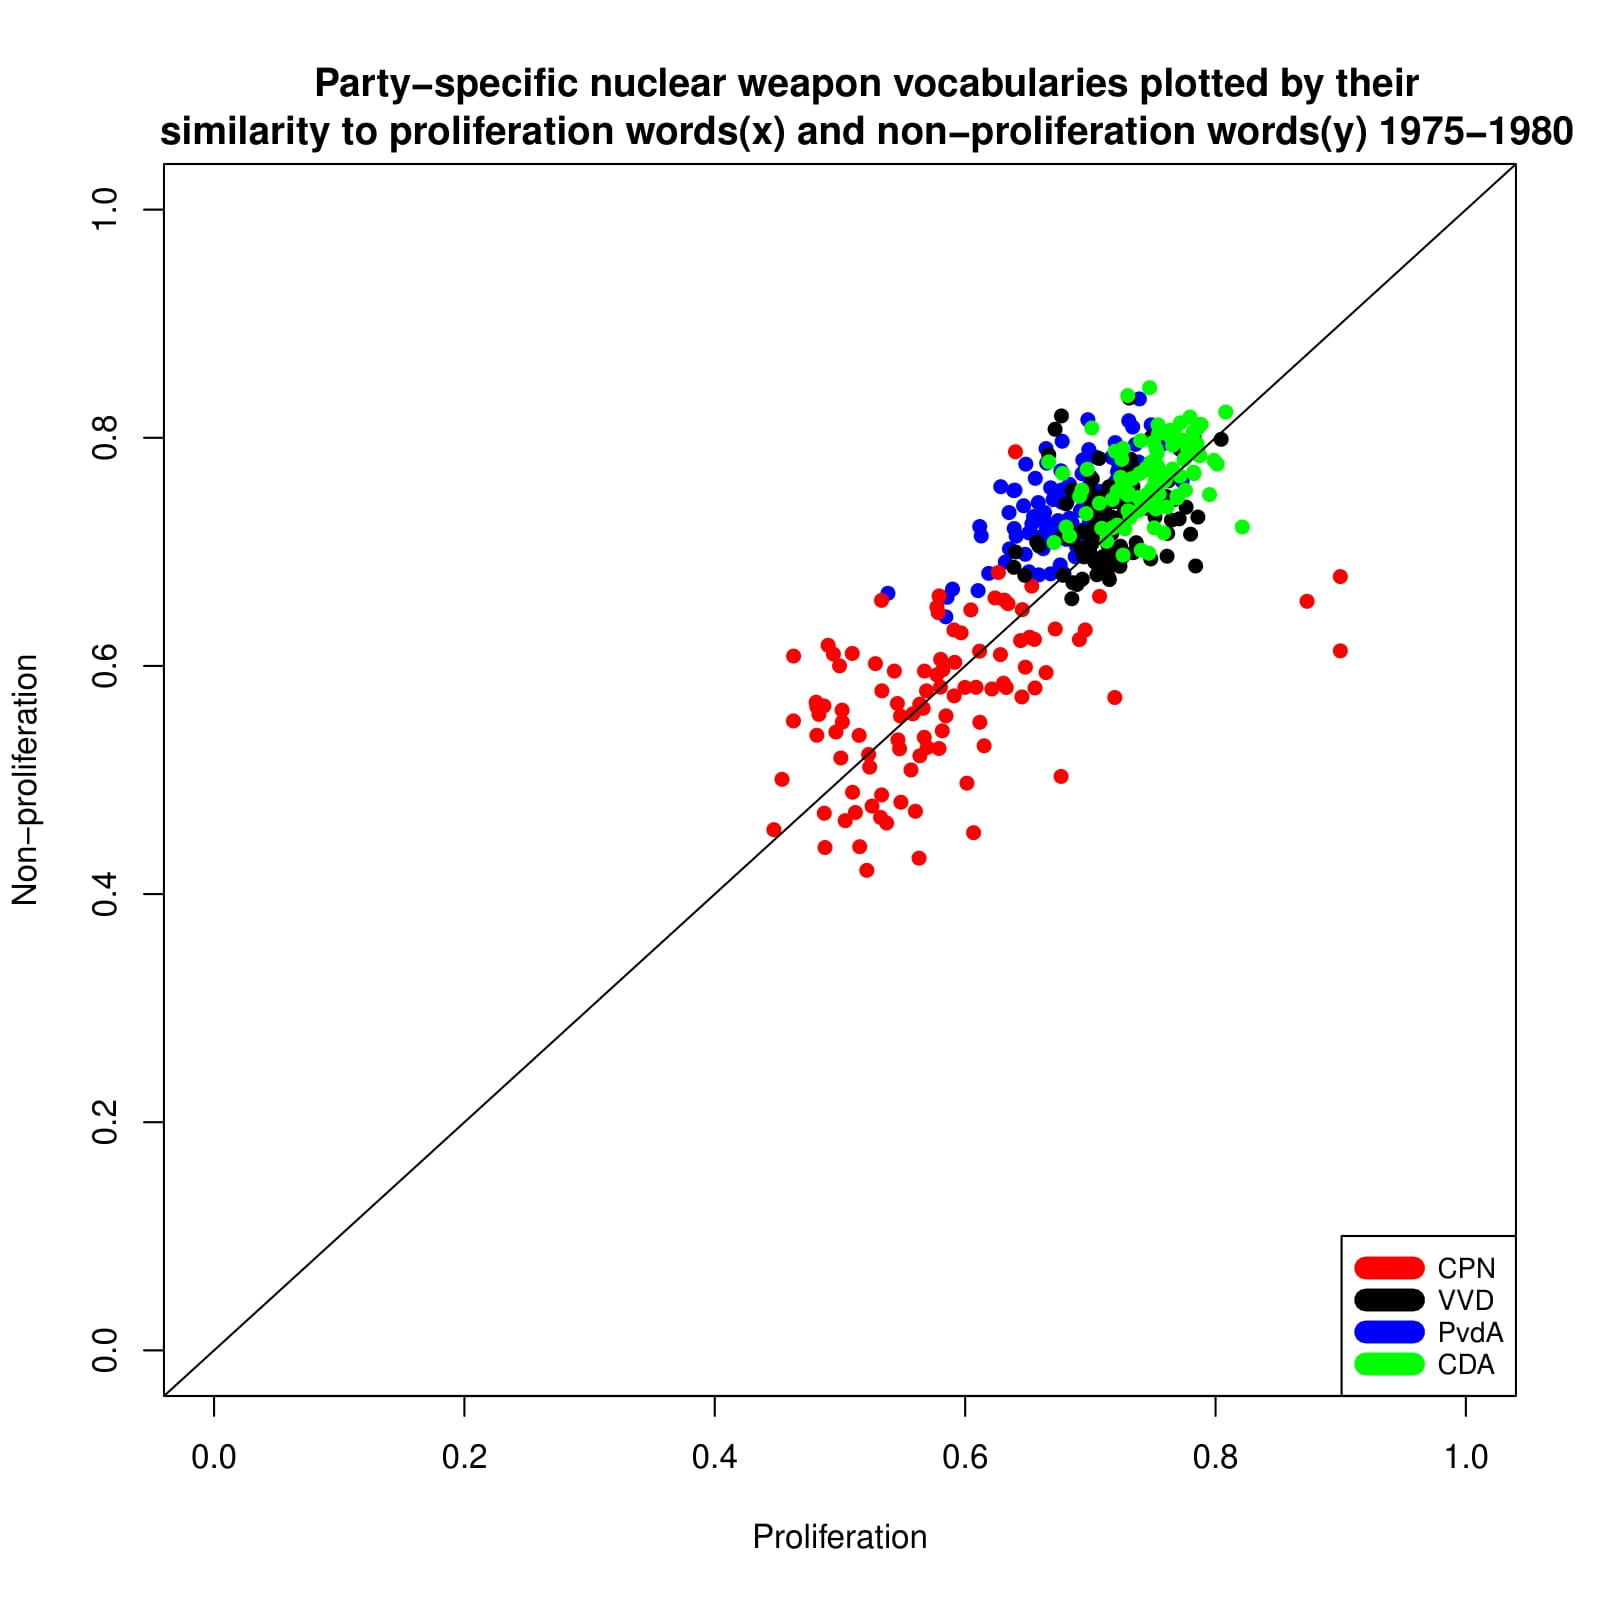

In [1]:
library("IRdisplay")
display_png(file="data/plot_7580_parties.jpg") 

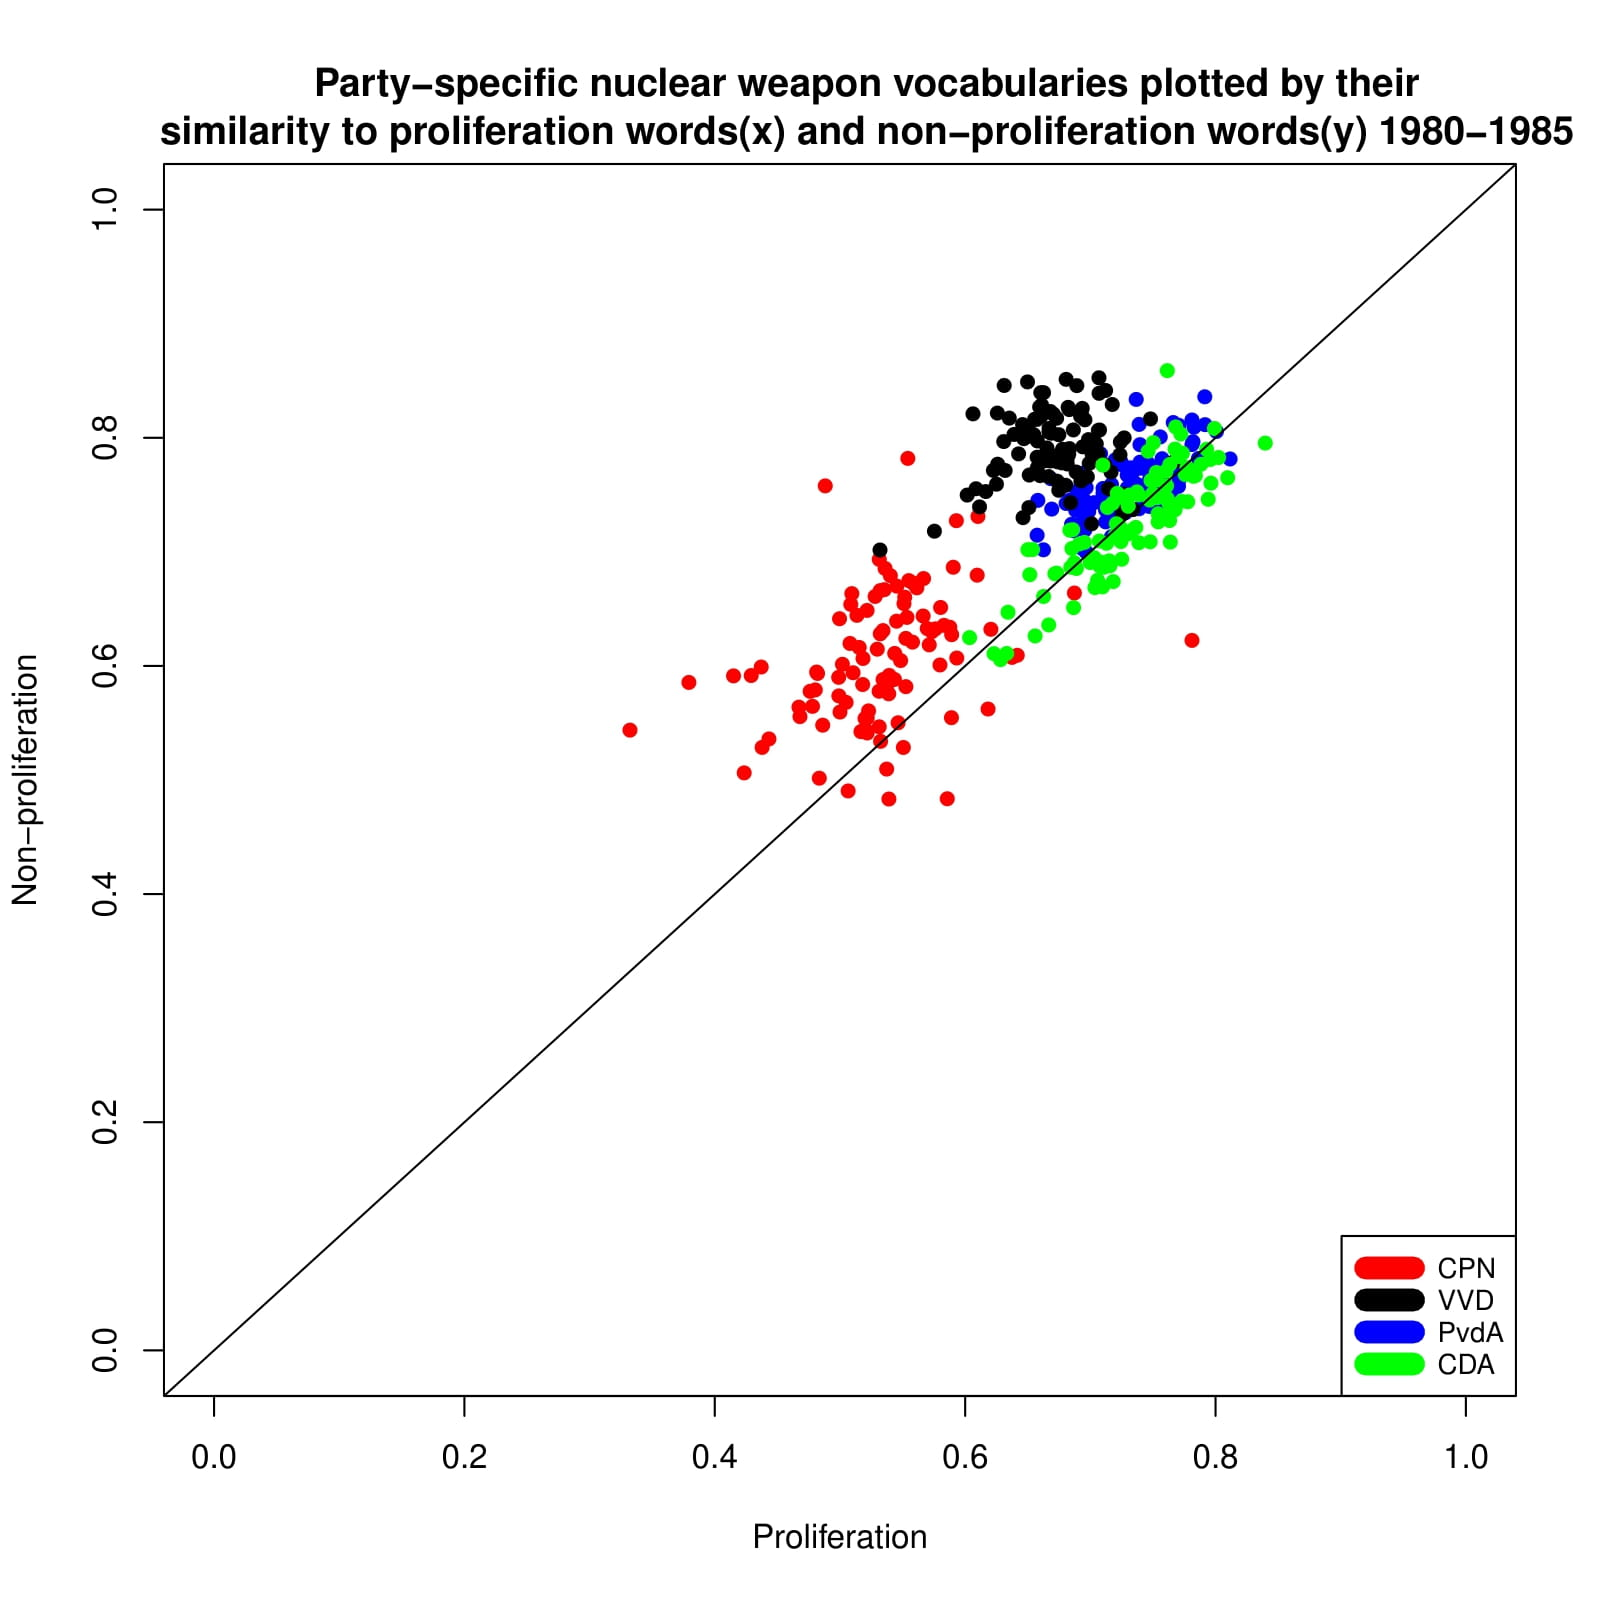

In [2]:
library("IRdisplay")
display_png(file="data/plot_8085_parties.jpg") 